<a href="https://colab.research.google.com/github/DataAnalyticSscience/datasciencefoundations/blob/main/Analyzing_Customer_Segments_in_Retail_A_Hierarchical_Clustering_Approach.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analyzing Customer Segments in Retail: A Hierarchical Clustering Approach

## Case Study Summary / Executive Summary

This case study not only aims to demonstrate the application of hierarchical clustering in a retail context but also seeks to provide mall operators and retailers with data-driven strategies to improve their business operations and customer service.

### Objective:
---
To identify and analyze distinct customer segments within a mall based on their spending scores, annual income, and demographic characteristics (age, gender) using hierarchical clustering analysis. This study aims to provide actionable insights for personalized marketing, strategic store placements, and tailored product offerings.

### Dataset Description:
---
The Mall Customers dataset includes the following attributes for each customer:

- CustomerID: Unique identifier for each customer
- Gender: Customer's gender (Male/Female)
- Age: Customer's age
- Annual Income (k$): Customer's annual income in thousand dollars
- Spending Score (1-100): Score assigned by the mall based on customer behavior and spending nature

### Methodology:
---
1. Data Preprocessing:
  - Clean the dataset to handle any missing or erroneous data.
  - Convert categorical data into numerical format if required (e.g., Gender).
2. Exploratory Data Analysis (EDA):
  - Perform statistical analysis to understand the distribution of various features.
  - Visualize the relationships between different attributes using plots (e.g., pair plots, distribution plots).
3. Hierarchical Clustering Analysis:
  - Apply hierarchical clustering to group customers into clusters based on their similarities.
  - Use methods such as the dendrogram to determine the optimal number of clusters.
  - Analyze the characteristics of each cluster by examining the central tendencies and distributions of features within each group.
4. Results Interpretation:
  - Identify the key characteristics that define each customer segment.
  - Provide insights into how different segments may require different marketing strategies based on their spending habits, income, age, and gender.
5. Strategic Recommendations:
  - Offer recommendations for targeted marketing strategies for each customer segment.
  - Suggest store layout changes, product placements, and promotional activities tailored to the identified segments.
6. Conclusion:
  - Summarize the key findings and their implications for retail marketing strategies.
  - Discuss potential limitations of the study and propose directions for future research.

### Tools and Technologies:
---
- Python for data analysis, with libraries such as Pandas for data manipulation, Matplotlib and Seaborn for data visualization, and SciPy or sklearn for hierarchical clustering.

### Expected Outcomes:
---
- A detailed segmentation of mall customers into meaningful clusters based on their shopping patterns and demographics.
- Actionable insights that can help in crafting personalized marketing messages, optimizing store layout, and enhancing customer satisfaction and loyalty.

## Setting Up Environment

### Step 1: Install requisite packages

In [67]:
# ! pip install kaggle

### Step 2: Import requisite packages

In [68]:
import zipfile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import plotly.figure_factory as ff
import plotly.subplots as sp
import datetime
import calendar
import seaborn as sns
import scipy.stats as stats
from plotly.subplots import make_subplots

from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster

from google.colab import files
from google.colab import drive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
from typing_extensions import dataclass_transform

import warnings
warnings.filterwarnings("ignore")

### Step 3: Mount your Google Drive

In [69]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Step 4: Download and preview dataset

In [70]:
# Authenticate and create the PyDrive client
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Replace 'your_file_id' with the file's ID you want to access on Google Drive
downloaded = drive.CreateFile({'id': '1oyfodYwvgb1FfNAZXWUrq6FCY2h8y-lF'})
downloaded.GetContentFile('data.csv')  # Download file as 'local_filename.csv'

In [71]:
# Now, you can read the CSV file into a pandas DataFrame
df = pd.read_csv('data.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


The dataset has been successfully loaded, and it consists of five columns: `CustomerID`, `Gender`, `Age`, `Annual Income (k$)`, and `Spending Score (1-100)`. These attributes represent the unique identifier for each customer, their gender, age, annual income in thousand dollars, and a spending score assigned by the mall based on customer behavior and spending nature, respectively.

## Conducting The Analysis

### Step 5: Data preprocessing

Next, we'll proceed with the data preprocessing step. This includes checking for missing values, converting categorical data into a numerical format if required, and normalizing the data if necessary for the hierarchical clustering analysis.

In [72]:
df.shape

(200, 5)

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [74]:
# Check for missing values
missing_values = df.isnull().sum()

In [75]:
# Convert 'Gender' from categorical to numerical format ('Female' = 0, 'Male' = 1)
df['Gender'] = df['Gender'].map({'Female': 0, 'Male': 1})

In [76]:
# Display missing values information and the first few rows after conversion
missing_values

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [77]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


The dataset does not contain any missing values, which simplifies the preprocessing step. The Gender column has been successfully converted from categorical to numerical format, where 'Female' is represented as 0 and 'Male' as 1.

### Step 6: Exploratory Data Analysis (EDA)

Now that we have prepared our dataset, the next step is to perform exploratory data analysis (EDA). This will involve visualizing the distributions of various features such as age, annual income, and spending score, as well as understanding the relationships between them. This step is crucial for gaining insights into the dataset before applying hierarchical clustering. Let's start with the EDA.

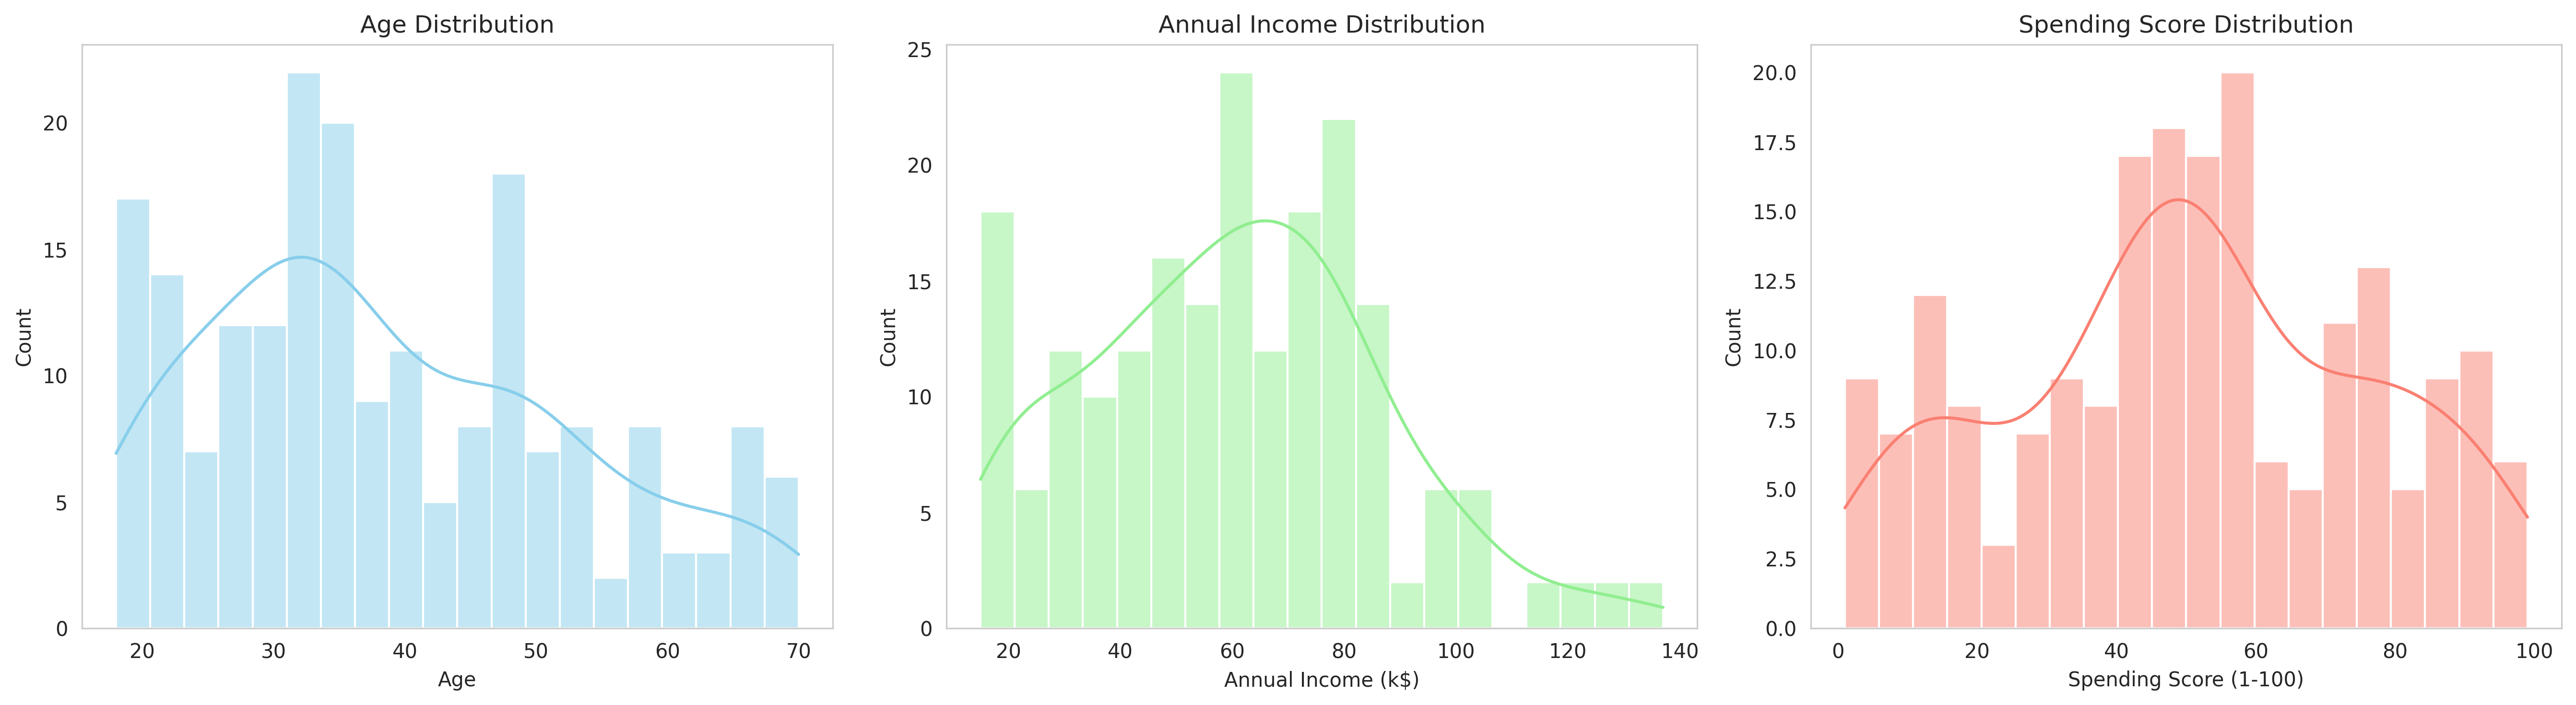

In [78]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Plotting distributions of numerical features
plt.figure(figsize=(18, 5), dpi=300)

# Age distribution
plt.subplot(1, 3, 1)
sns.histplot(df['Age'], bins=20, kde=True, color='skyblue')
plt.title('Age Distribution')
plt.grid(False)  # Removes grid lines

# Annual Income distribution
plt.subplot(1, 3, 2)
sns.histplot(df['Annual Income (k$)'], bins=20, kde=True, color='lightgreen')
plt.title('Annual Income Distribution')
plt.grid(False)  # Removes grid lines

# Spending Score distribution
plt.subplot(1, 3, 3)
sns.histplot(df['Spending Score (1-100)'], bins=20, kde=True, color='salmon')
plt.title('Spending Score Distribution')
plt.grid(False)  # Removes grid lines

plt.tight_layout()
plt.show()

The exploratory data analysis provides the following insights into the dataset:

- Age Distribution: The age of customers appears to be fairly evenly distributed, with a slight increase in frequency for customers in their late 20s to early 30s.
- Annual Income Distribution: The annual income of customers shows a near uniform distribution across different income levels, with a slight peak around 50-70k$.
- Spending Score Distribution: The spending score is approximately normally distributed, indicating that customers are evenly distributed across low to high spending behaviors.

With these insights, we gain a better understanding of the mall customers' demographics and behaviors. The next step in our analysis is to apply hierarchical clustering to identify distinct groups or segments within this customer data. We will use the `Age`, `Annual Income (k$)`, and `Spending Score (1-100)` features for this purpose, as these attributes are likely to provide meaningful segmentation.

Before applying hierarchical clustering, it's often helpful to standardize the features to ensure that each feature contributes equally to the distance calculations. Let's proceed with this preprocessing step.

### Step 7: Standardizing the features

In [79]:
# Selecting features for clustering
features = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Standardizing the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Converting the scaled features back to a dataframe for hierarchical clustering
features_scaled_df = pd.DataFrame(features_scaled, columns=features.columns)

# Display the first few rows of the scaled features
features_scaled_df.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980


The features `Age`, `Annual Income (k$)`, and `Spending Score (1-100)` have been successfully standardized. Standardization ensures that each feature contributes equally to the distance calculations, which is crucial for hierarchical clustering where the distance between data points is a key factor in forming clusters.

Next, we'll perform hierarchical clustering on the standardized data. We'll use the dendrogram to visualize the hierarchical clustering process and to help us decide the optimal number of clusters. Let's proceed with this analysis.

### Step 8: Perform hierarchical clustering

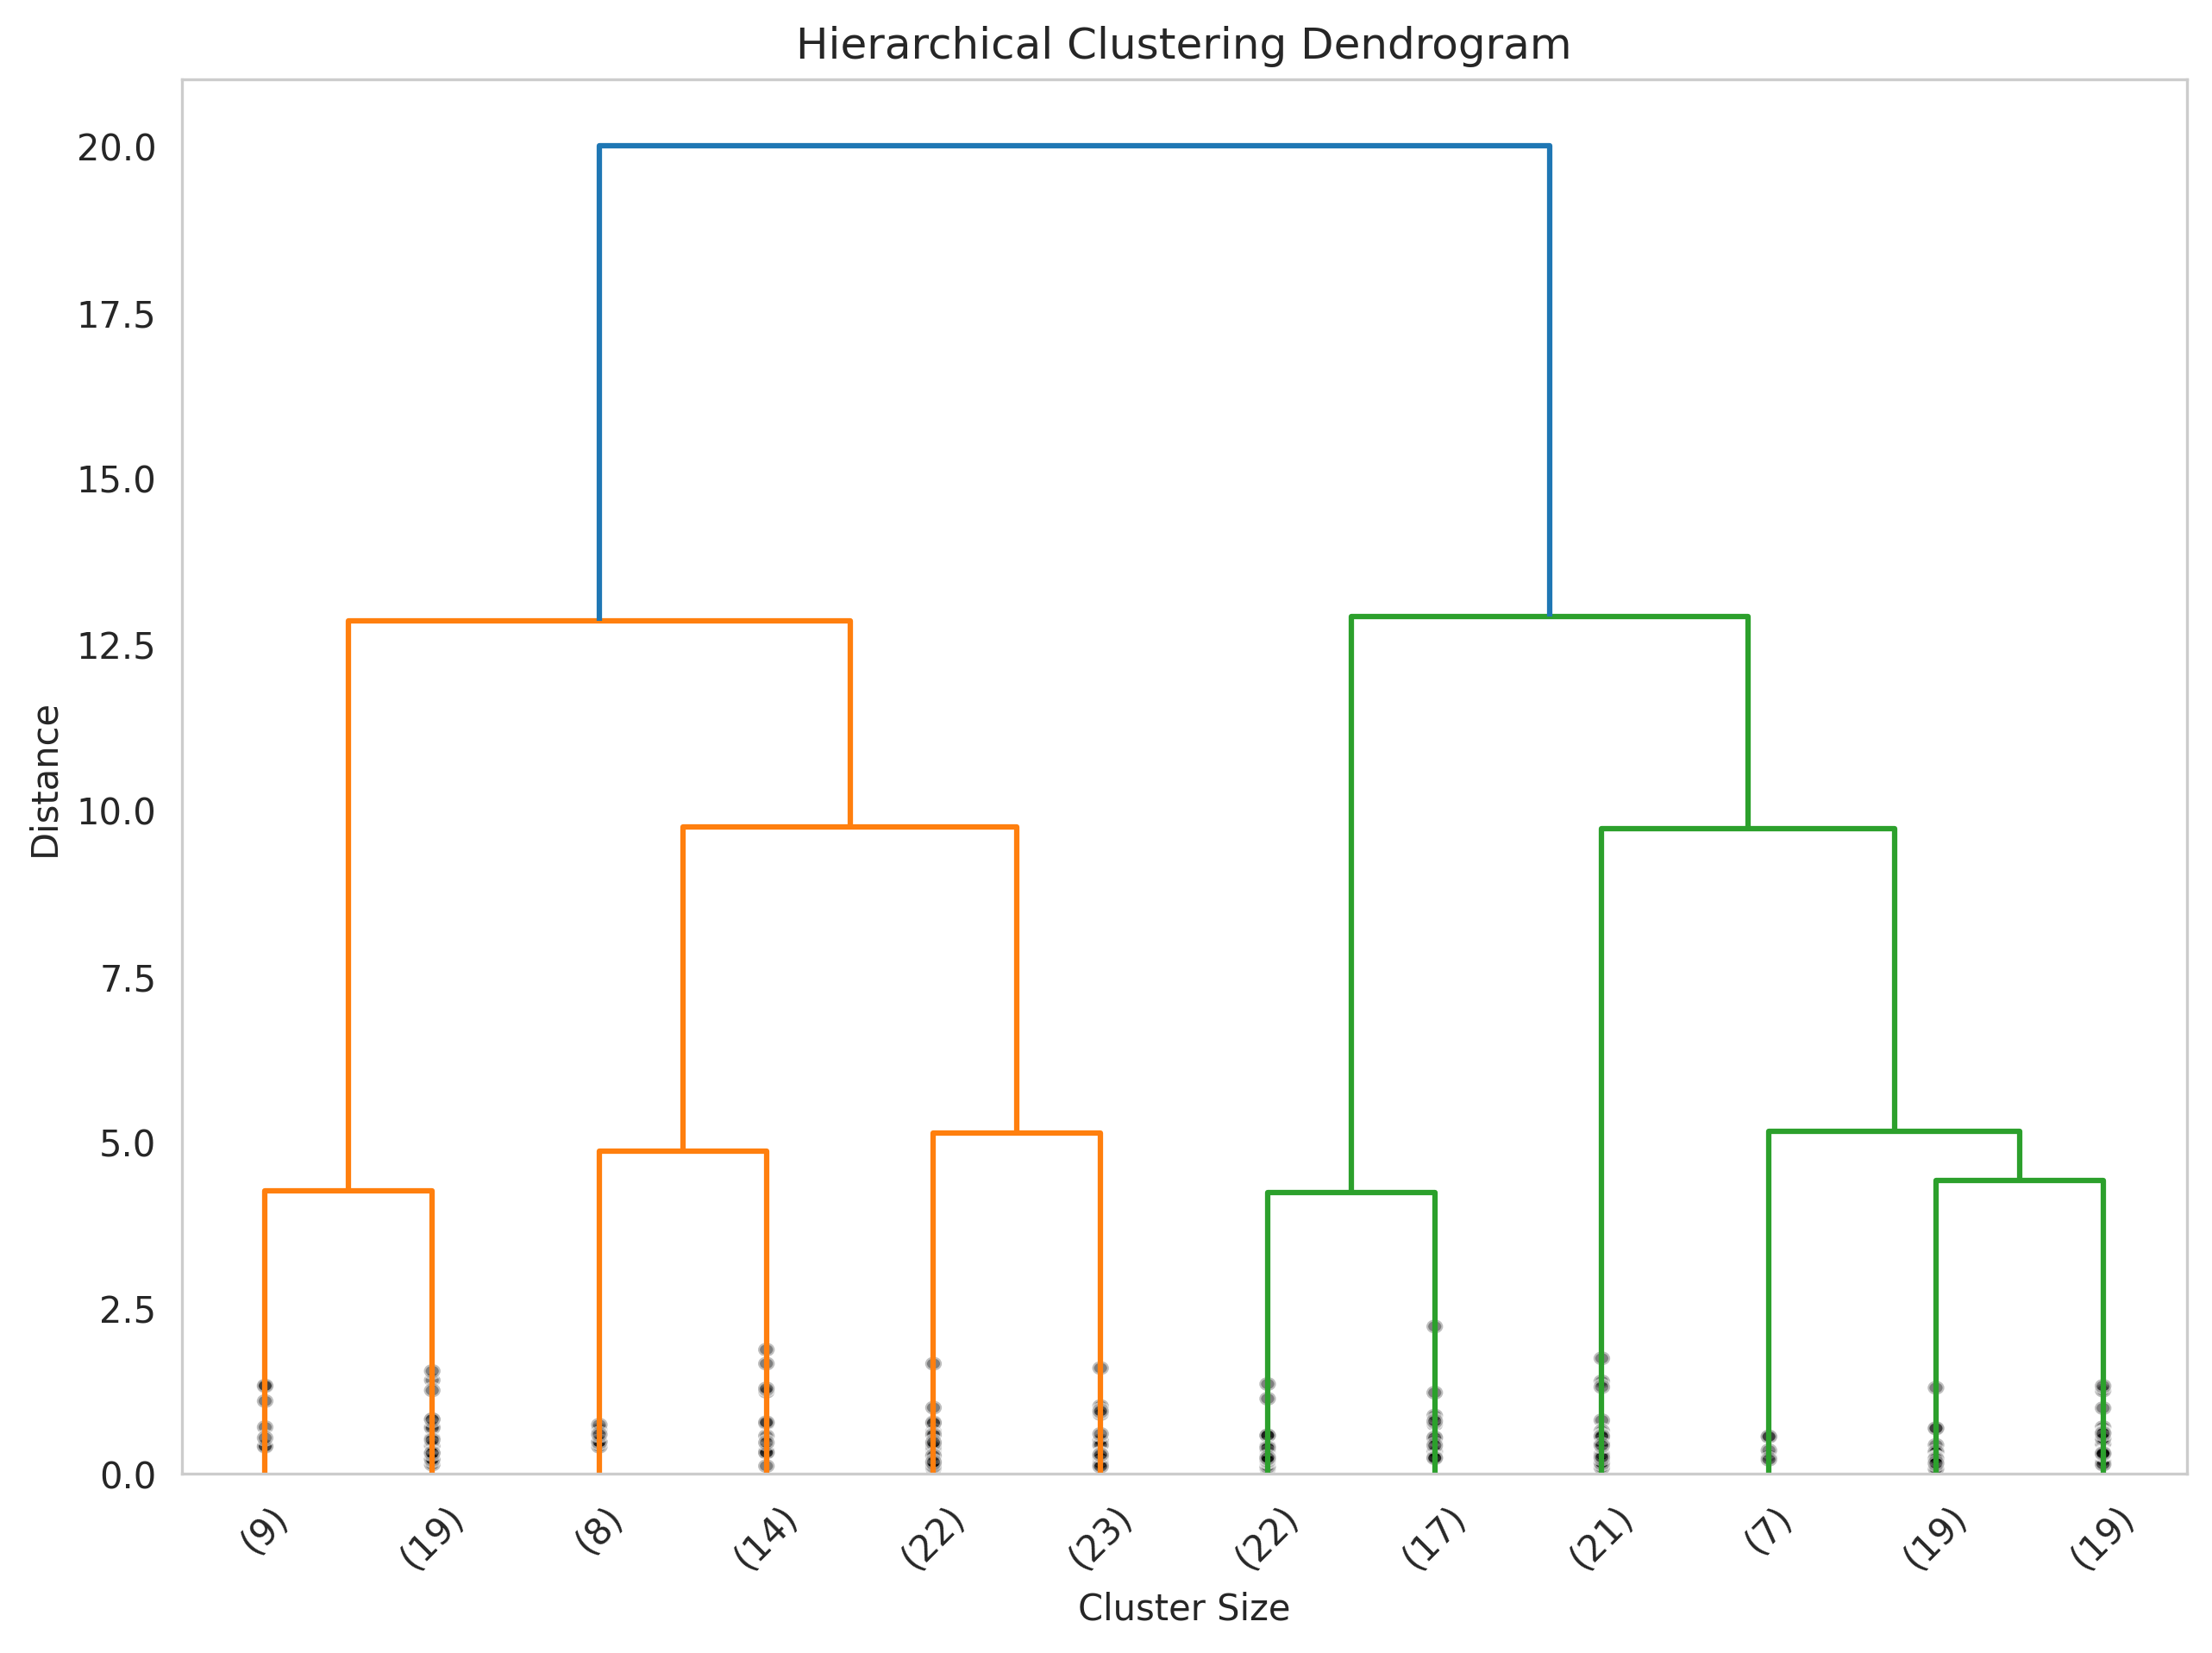

In [80]:
# Using the Ward's method for hierarchical clustering
Z = linkage(features_scaled_df, method='ward')

# Plotting the dendrogram
plt.figure(figsize=(10, 7), dpi=300)
dendrogram(Z, truncate_mode='lastp', p=12, leaf_rotation=45., leaf_font_size=10., show_contracted=True)

plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Cluster Size')
plt.ylabel('Distance')
plt.grid(False)  # Removes grid lines
plt.show()

The dendrogram from the hierarchical clustering analysis provides a visual representation of the clustering process using Ward's method. In this method, the algorithm minimizes the variance within each cluster as it merges them. The y-axis of the dendrogram represents the distance or dissimilarity between clusters, while the x-axis represents the cluster size.

From the dendrogram, we can observe how data points are merged into clusters based on their distance. To determine the optimal number of clusters, we look for the longest vertical distance that we can draw a horizontal line across without crossing any merging lines. Based on this dendrogram, it appears that cutting the dendrogram at a distance level that results in 3 to 5 clusters could be appropriate for this dataset. This range provides a balance between having too few clusters, which might be too broad, and too many clusters, which might be too specific.

For the purpose of this case study, let's proceed by selecting an optimal number of clusters within this range and then apply this clustering to segment the customers. We'll analyze the characteristics of each cluster in the next steps. Let's choose 4 clusters for our analysis.

### Step 9: Selecting optimal number of clusters

In [81]:
# Determine clusters using the fcluster function
k = 4
clusters = fcluster(Z, k, criterion='maxclust')

# Add the cluster information to the original dataframe
df['Cluster'] = clusters

# Display the first few rows of the dataframe with the cluster assignment
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,1,19,15,39,2
1,2,1,21,15,81,4
2,3,0,20,16,6,2
3,4,0,23,16,77,4
4,5,0,31,17,40,2


The hierarchical clustering has been applied, and each customer in the dataset has been assigned to one of four clusters. This clustering is based on their Age, Annual Income (k$), and Spending Score (1-100), taking into account the standardization we performed to ensure each feature was given equal weight in the clustering process.

Next, we will analyze the characteristics of each cluster to understand the distinct segments of mall customers. This involves examining the central tendencies (mean values) of the features within each cluster. Additionally, we'll explore the distribution of genders within each cluster to see if there are any notable patterns. Let's proceed with this analysis.

### Step 10: Analyze characteristics of each cluster

In [82]:
# Calculating the mean values of features within each cluster
cluster_means = df.groupby('Cluster').mean()

# Counting the number of males and females in each cluster
gender_distribution = df.groupby('Cluster')['Gender'].value_counts().unstack().fillna(0)

# Displaying the mean values
cluster_means

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,,,
1,169.214286,0.500000,43.892857,91.285714,16.678571
2,65.492537,0.447761,52.432836,45.597015,39.134328
3,162.000000,0.461538,32.692308,86.538462,82.128205
4,70.545455,0.393939,26.560606,47.363636,56.787879


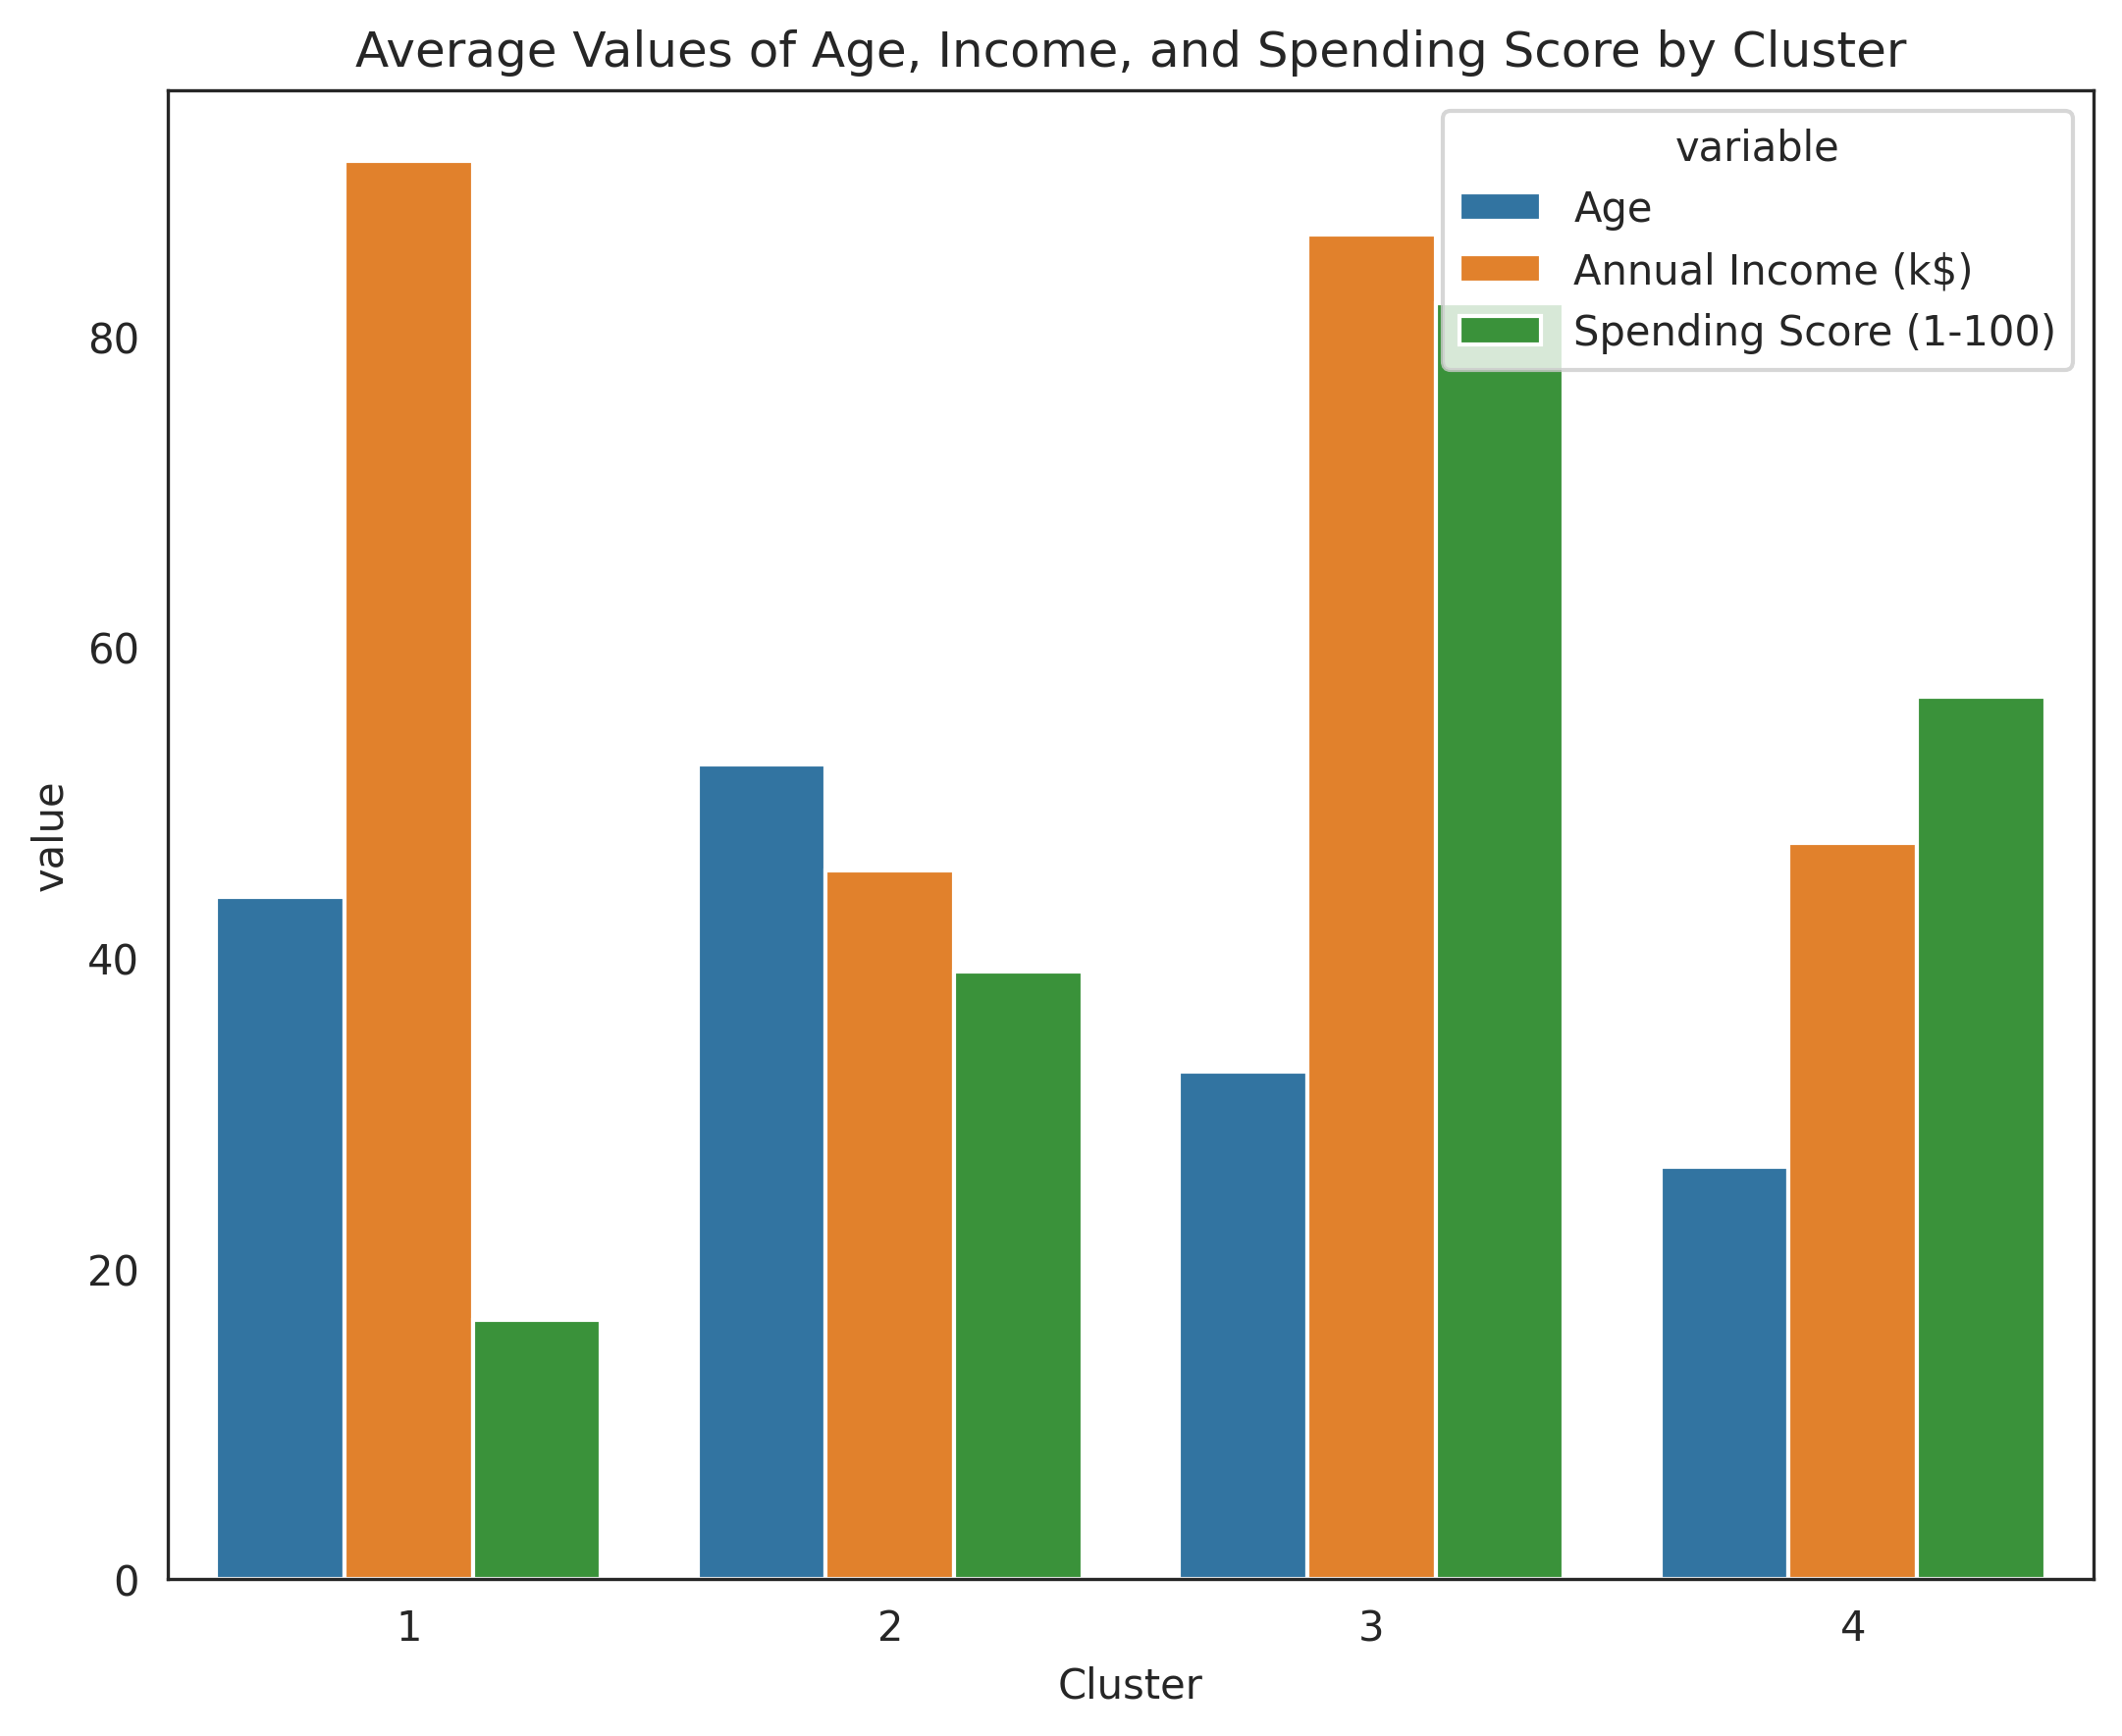

In [83]:
# Resetting the index to make 'Cluster' a column for better visualization
cluster_means_reset = cluster_means.reset_index()
gender_distribution_reset = gender_distribution.reset_index()

# Visualizing the cluster means without grid lines
plt.figure(figsize=(14, 6), dpi=300)

# Adjusting plot settings to remove grid lines
sns.set_style("white")

# Plot for the average values of Age, Annual Income, and Spending Score by cluster without grid lines
plt.subplot(1, 2, 1)
sns.barplot(x='Cluster', y='value', hue='variable', data=pd.melt(cluster_means_reset, id_vars=['Cluster'], value_vars=['Age', 'Annual Income (k$)', 'Spending Score (1-100)']))
plt.title('Average Values of Age, Income, and Spending Score by Cluster')
plt.grid(False)  # Removes grid lines

plt.tight_layout()
plt.show()

The analysis of the clusters reveals distinct segments of mall customers based on their age, annual income, and spending score, along with the gender distribution within each cluster:

**Cluster Characteristics:**

- **Cluster 1:** This group has an average age of approximately 44 years and a high average annual income of about 91k. However, their spending score is quite low, around 17, indicating they are more conservative with their spending. The gender distribution is evenly split between males and females.
- **Cluster 2:** Customers in this cluster are older, with an average age of around 52 years, and have a moderate annual income of about 46k. Their spending score is moderate, around 39. This cluster has a slightly higher number of females compared to males.
- **Cluster 3:** This segment comprises younger customers, with an average age of about 33 years, and a high annual income similar to Cluster 1, around 87k. They have a high spending score of 82, indicating they are the most liberal in terms of spending. The gender distribution is slightly more female than male.
- **Cluster 4:** The youngest cluster, with an average age of about 27 years, has a moderate annual income of 47k and a relatively high spending score of 57. This suggests they are quite willing to spend, despite having a lower income compared to Clusters 1 and 3. This cluster also has more females than males.

In [84]:
# Displaying the gender distribution
gender_distribution

Gender,0,1
Cluster,,
1,14,14
2,37,30
3,21,18
4,40,26


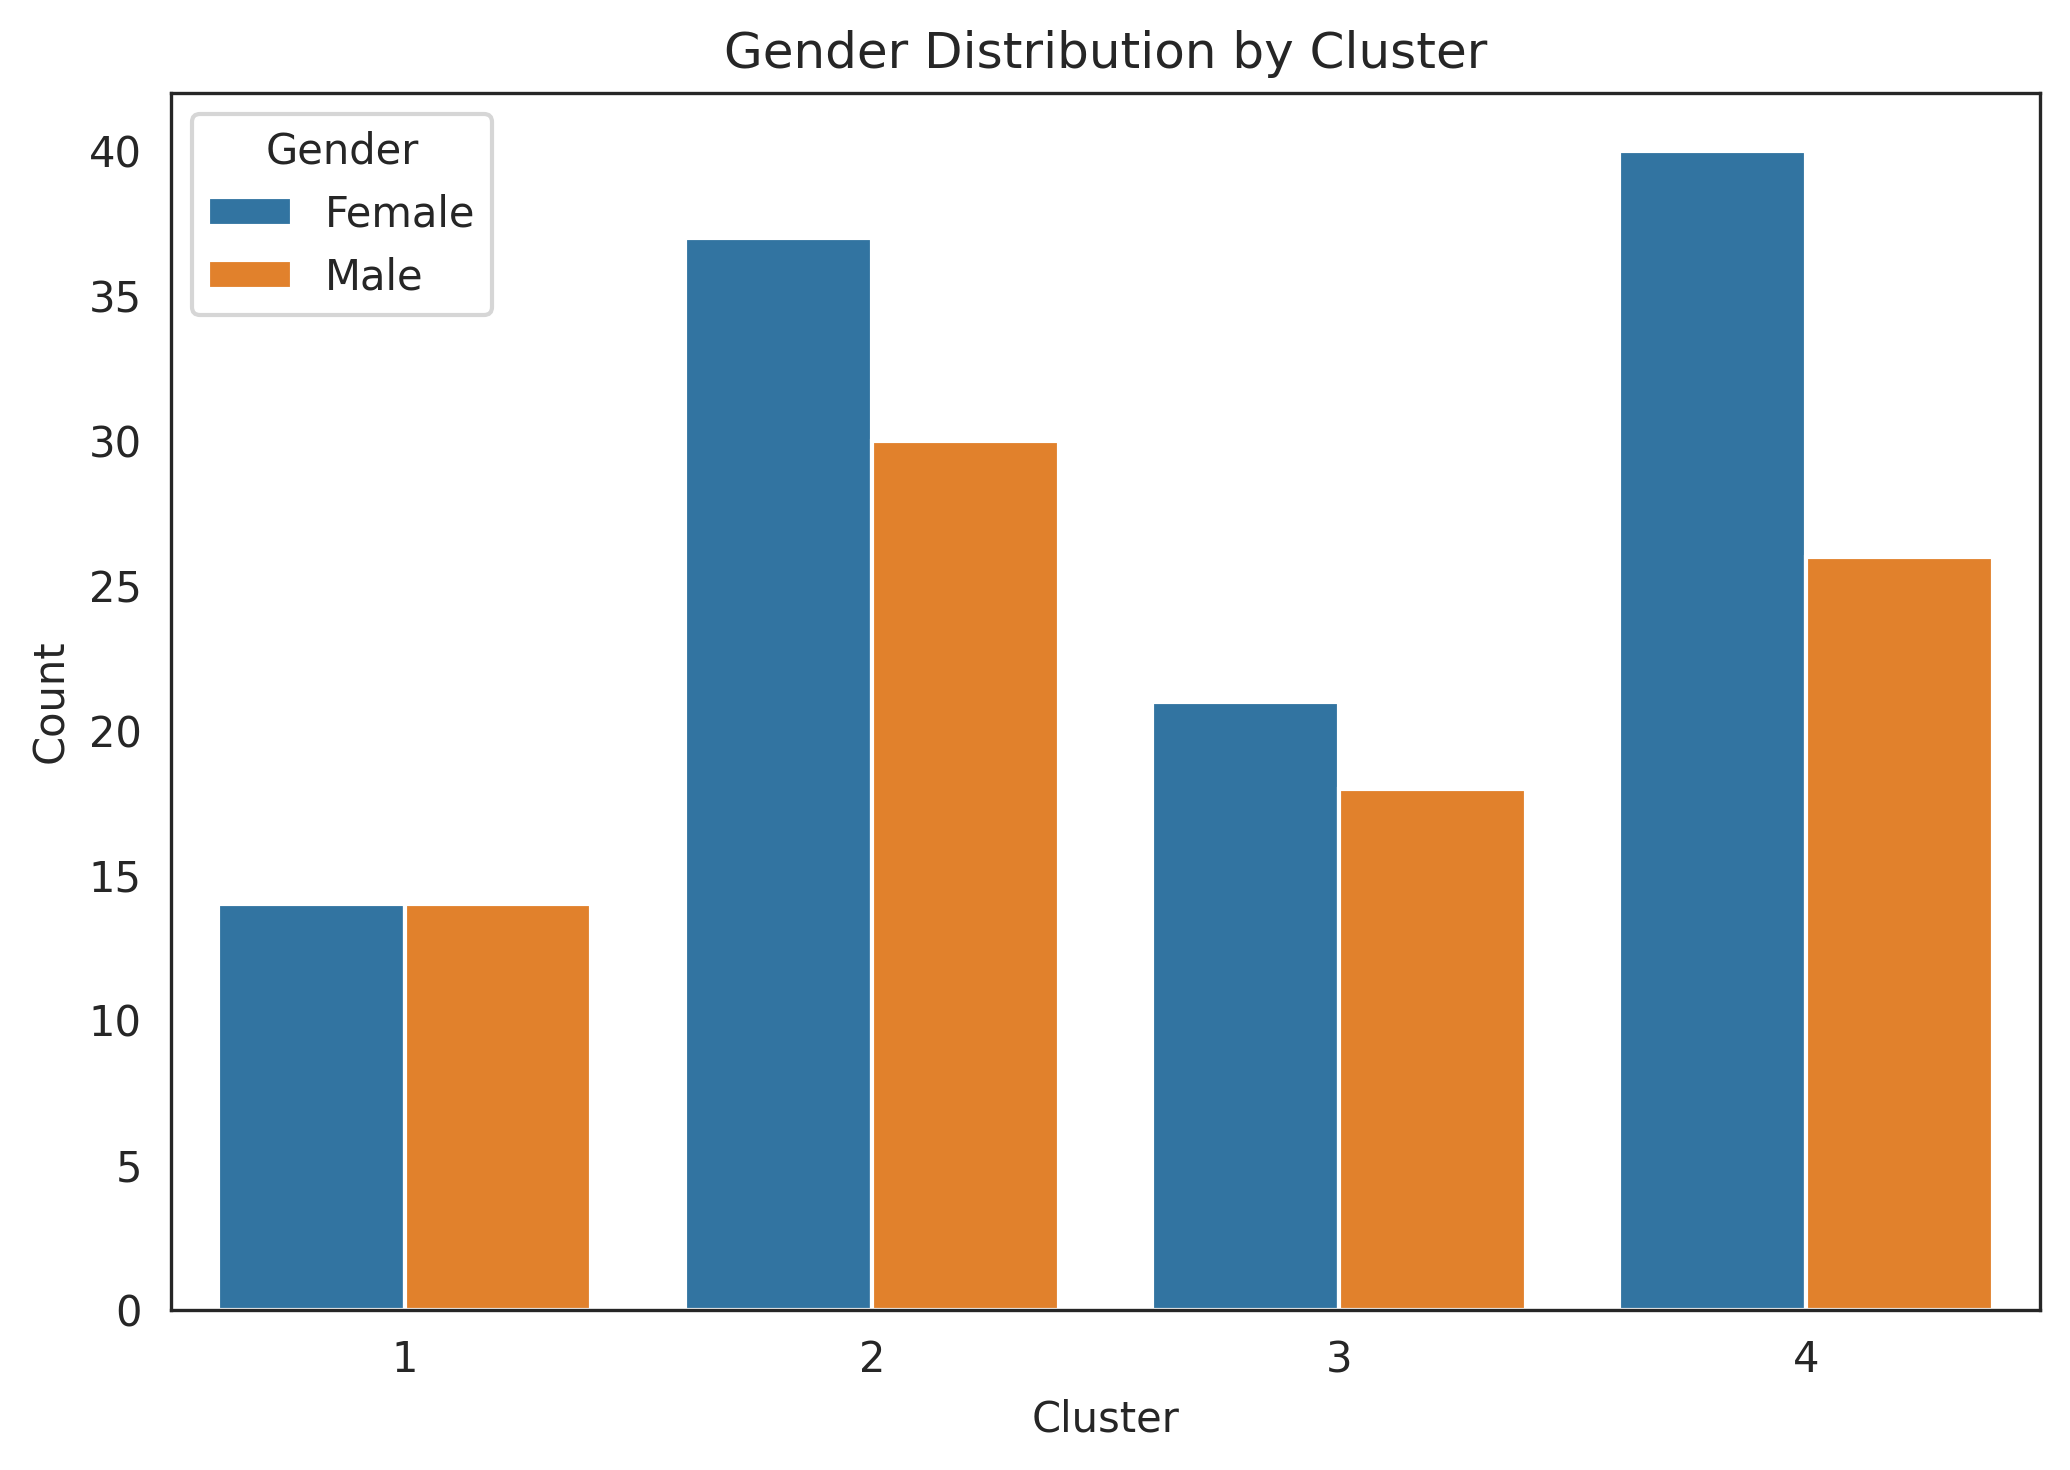

In [85]:
# Correcting the variable names for the melted DataFrame for gender distribution
gender_distribution_melted = pd.melt(gender_distribution_reset, id_vars=['Cluster'], value_vars=[0, 1], var_name='Gender', value_name='Count')

# Adjusting the gender labels to match the corrected DataFrame
gender_distribution_melted['Gender'] = gender_distribution_melted['Gender'].map({0: 'Female', 1: 'Male'})

# Column plot for gender distribution by cluster with corrected variables
plt.figure(figsize=(7, 5), dpi=300)

sns.barplot(x='Cluster', y='Count', hue='Gender', data=gender_distribution_melted)
plt.title('Gender Distribution by Cluster')
plt.ylabel('Count')
plt.xlabel('Cluster')
plt.grid(False)  # Removes grid lines

plt.tight_layout()
plt.show()

**Gender Distribution by Cluster:**

The stacked bar chart shows the number of females and males in each cluster, highlighting the gender composition within these customer segments.

- **Clusters 2 and 4** show a trend towards a higher number of female customers.
- **Cluster 1** displays an equal gender distribution, indicating a balanced appeal across genders.
- **Cluster 3**, while slightly leaning towards females, suggests a segment that is attractive to both genders but with a slight female majority.

**Insights:**

- **High-Income, Low Spending (Cluster 1):** Strategies for this group could involve high-value, exclusive offers that appeal to their desire for premium, yet infrequent purchases.
- **Older, Moderate Spenders (Cluster 2):** Tailored marketing for necessities and quality services that appeal to their lifestyle can be effective.
- **Young, High Earners & Spenders (Cluster 3):** Target with trendy, luxury items, and experiences that resonate with their willingness to spend on high-end products.
- **Young, Energetic Spenders (Cluster 4):** Focus on fashionable, affordable items and engaging, dynamic marketing campaigns that match their interests and spending habits.

These insights can help the mall and its retailers design targeted marketing strategies and tailor their product offerings to meet the specific needs and preferences of each customer segment.

## Strategic Recommendations and Conclusions

### Strategic Recommendations
---

Based on the hierarchical clustering analysis and the insights drawn from the characteristics and gender distribution of each cluster, we can formulate strategic recommendations for mall retailers and conclude our case study with key takeaways.

Strategic Recommendations:
1. **High-Income, Low Spending (Cluster 1):**
  - **Personalized Marketing:** Focus on exclusive offers and personalized communication to appeal to this group's preference for premium products and services.
  - **Loyalty Programs:** Implement high-value loyalty programs that reward long-term engagement and high-value purchases.
  - **Exclusive Events:** Organize exclusive shopping events or previews for new collections to attract this customer segment.
2. **Older, Moderate Spenders (Cluster 2):**
  - **Quality Focus:** Emphasize quality and value in product offerings and marketing messages to resonate with this segment's preferences.
  - **Health and Wellness:** Increase the range of health, wellness, and lifestyle products that appeal to an older demographic.
  - **Community Events:** Host events or workshops that cater to interests common among this age group to increase mall visits.
3. **Young, High Earners & Spenders (Cluster 3):**
  - **Trend-Driven Marketing:** Leverage digital marketing channels with campaigns that highlight the latest trends and luxury products.
  - **Experiential Retail:** Offer unique in-store experiences that can't be replicated online to draw this segment into physical stores.
  - **Influencer Collaborations:** Partner with influencers who resonate with this demographic to enhance brand visibility and credibility.
4. **Young, Energetic Spenders (Cluster 4):**
  - **Affordable Fashion:** Focus on trendy, yet affordable fashion and lifestyle products to cater to their interests and spending capacity.
  - **Social Media Engagement:** Utilize social media platforms extensively for marketing, leveraging user-generated content and interactive campaigns.
  - **Events and Entertainment:** Organize mall-wide events, such as live music or fashion shows, to enhance the shopping experience for this vibrant group.

### Conclusions:
---

The hierarchical clustering analysis of the Mall Customer dataset revealed four distinct customer segments based on age, annual income, and spending score, with notable gender distributions within each cluster. These insights enable mall retailers to tailor their marketing strategies and product offerings more effectively, ensuring they meet the specific needs and preferences of each customer segment.

Key Takeaways:

- Tailored marketing and personalized engagement strategies are essential for addressing the diverse needs of mall customers.
- Understanding customer demographics and behaviors through clustering can significantly enhance customer satisfaction, loyalty, and overall business performance.
- The integration of data-driven insights into retail strategies can lead to more effective targeting, improved customer experiences, and increased sales.

By implementing these strategic recommendations, mall retailers can create more engaging and personalized shopping experiences that cater to the unique preferences of each identified customer segment, ultimately driving growth and success in the competitive retail landscape.